In [1]:
%matplotlib inline
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

In [2]:
it = ['2019-01-13T21:00:00']                             #Inicio das observaçoes
itime = Time(it, format = 'isot', scale = 'utc' )

In [3]:
file = open('logfile','r')                       #Abrindo o arquivo com os dados
fwhm_750 = []
fwhm_1998NU = []                                 #Listas vazias para salvar os valores do fwhm

#750
for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 1
    if indice < 123 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_750.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_750.append(float(linha[39:]))
#1998NU  
    elif indice > 123:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_1998NU.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_1998NU.append(float(linha[39:]))

fwhm_750 = sorted(fwhm_750)            
fwhm_1998NU = sorted(fwhm_1998NU)

<h1>750</h1>

In [4]:
#imagens usadas no psfmeasure = 15/30/45/60/75/90/105/120/135/150/175

name_750 = '750/750_60s_b2x2-015_R.fit'
imagens_750 = []                                                        #Lista com o nome das imagens

for i in range(0,90,15):
    number_750 = name_750[18:20].replace(name_750[18:20],str(int(name_750[18:20])+i))
    imagens_750.append('750/750_60s_b2x2-0' + str(number_750) + '_R.fit' )
for i in range(105,160,15):
        name_750 = '750/750_60s_b2x2-100_R.fit'
        number_750 = name_750[19:20].replace(name_750[19],str(int(name_750[19])+i))
        imagens_750.append('750/750_60s_b2x2-' + str(number_750) + '_R.fit' )
        
imagens_750.append('750/750_60s_b2x2-175_R.fit')

In [5]:
datas_750 = []                                                #Lista com as datas

for i in imagens_750:                                         #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                      #Extraindo o header de cada imagem
            datas_750.append(hdul[0].header['DATE-OBS'])
            
tempos_750 = Time(datas_750, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_750 = []                                                                 #Inicializando a lista com os pontos
t_750 = np.empty(len(tempos_750))                                 #Inicializando array para plotar

for i in range(len(tempos_750)):
    dt_750.append(tempos_750[i] - itime)
    t_750[i] = (dt_750[i].value)*24                               #Calculando os valores de dt em HORAS

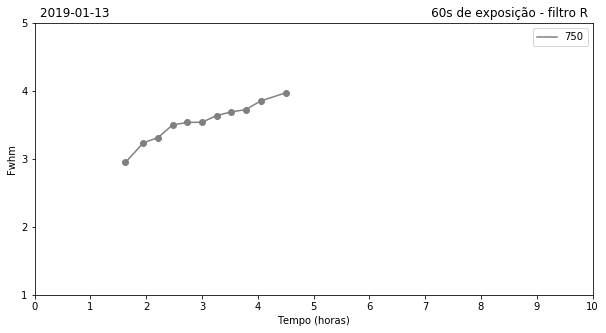

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(t_750, fwhm_750, color = 'grey')
plt.plot(t_750, fwhm_750, color = 'grey', label  ='750')
plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-13' + ' '*83 + '60s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>1998NU</h1>

In [7]:
#imagens usadas no psfmeasure = 10,20,30,40,50
name_1998NU = '1998NU/1998NU_40s_b2x2-010_R.fit'
imagens_1998NU = []                                                        #Lista com o nome das imagens

for i in range(0,50,10):       
    number_1998NU = name_1998NU[23:26].replace(name_1998NU[24:26],str(int(name_1998NU[24:26])+i))
    imagens_1998NU.append('1998NU/1998NU_40s_b2x2-' + str(number_1998NU) + '_R.fit' )

In [8]:
datas_1998NU = []                                                #Lista com as datas

for i in imagens_1998NU:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_1998NU.append(hdul[0].header['DATE-OBS'])
            
tempos_1998NU = Time(datas_1998NU, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_1998NU = []                                                   #Inicializando a lista com os pontos
t_1998NU = np.empty(len(tempos_1998NU))                                 #Inicializando array para plotar

for i in range(len(tempos_1998NU)):
    dt_1998NU.append(tempos_1998NU[i] - itime)
    t_1998NU[i] = (dt_1998NU[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_1998NU = sorted(t_1998NU)

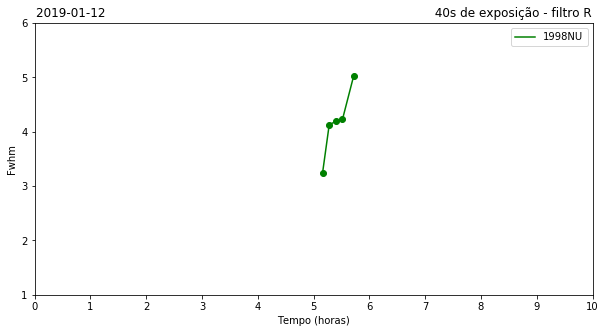

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(t_1998NU, fwhm_1998NU, color = 'green')
plt.plot(t_1998NU, fwhm_1998NU, color = 'green', label='1998NU')
plt.yticks(np.arange(1, 7, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '40s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

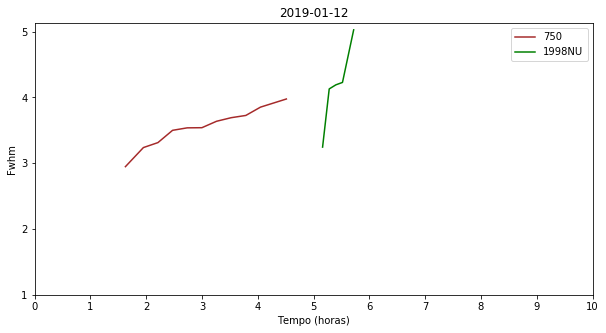

In [10]:
plt.figure(figsize=(10,5))
plt.plot(t_750, fwhm_750, color = 'brown', label = '750')
plt.plot(t_1998NU, fwhm_1998NU, color = 'green', label = '1998NU')

plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-13_plotfwhmxtime.png')
plt.legend()
plt.show()


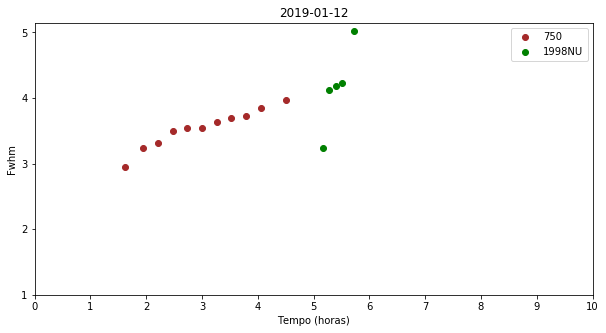

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(t_750, fwhm_750, color = 'brown', label = '750')
plt.scatter(t_1998NU, fwhm_1998NU, color = 'green', label = '1998NU')

plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-13_scatterfwhmxtime.png')
plt.legend()
plt.show()


In [12]:
fwhm = fwhm_1998NU + fwhm_750
mean_fwhm = std.mean(fwhm)
median_fwhm = std.median(fwhm)

print(mean_fwhm)
print(median_fwhm)

3.73575625
3.6641
